In [2]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [8]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
print(iris.data.shape)

(150, 4)


In [13]:
print(iris.target.shape)

(150,)


In [14]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [15]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [16]:
import pandas as pd

In [21]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Series([iris.target_names[i] for i in iris.target])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [30]:
pd.set_option('display.precision', 2)
pd.set_option('display.max_columns', 5)
pd.set_option('display.width', None)

In [31]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [34]:
%matplotlib inline

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

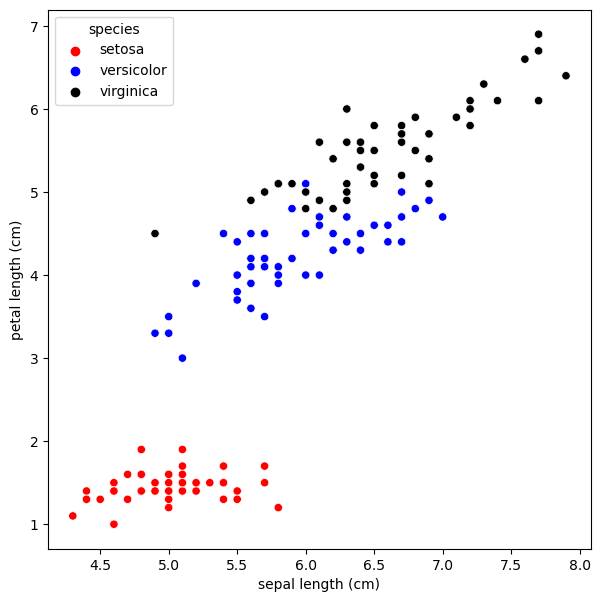

In [61]:
fig = plt.figure(figsize=(7,7))
axes = sns.scatterplot(data=iris_df, x=iris_df['sepal length (cm)'], y=iris_df['petal length (cm)'], hue=iris_df['species'], palette=['red', 'blue', 'black'])
# axes = sns.scatterplot(data= iris_df, x=iris_df.iloc[0], y=iris_df.iloc[1])

In [63]:
# Dimensionality reduction using TSNE

In [64]:
from sklearn.manifold import TSNE

In [66]:
tsne = TSNE(n_components=2, random_state=10)

In [72]:
reduced_df = tsne.fit_transform(iris.data)
reduced_df[:5]

array([[-23.875437 ,  -1.4305894],
       [-21.332832 ,  -2.5229647],
       [-21.183956 ,  -1.3164853],
       [-20.842545 ,  -1.61192  ],
       [-23.845785 ,  -0.9457335]], dtype=float32)

In [73]:
print(reduced_df.shape)

(150, 2)


In [74]:
print(type(reduced_df))

<class 'numpy.ndarray'>


In [75]:
reduced_df = pd.DataFrame(reduced_df)

In [76]:
reduced_df

,0,1
0,-23.88,-1.43
1,-21.33,-2.52
2,-21.18,-1.32
3,-20.84,-1.61
4,-23.85,-0.95
...,...,...
145,15.41,-1.41
146,12.04,-1.46
147,14.41,-1.40
148,15.35,-3.39


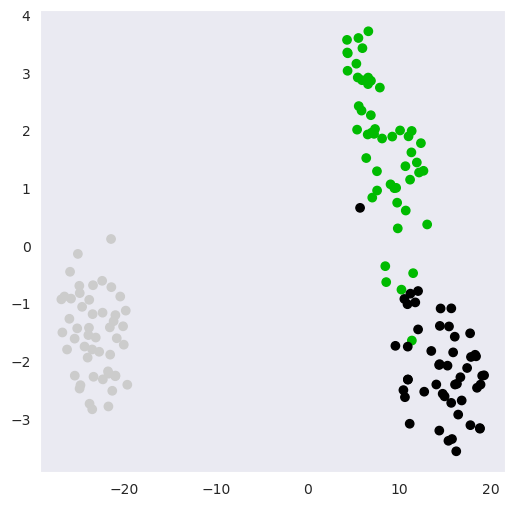

In [87]:
fig = plt.figure(figsize=(6,6))
axes = plt.scatter(reduced_df[0], reduced_df[1], c=iris.target, cmap=plt.get_cmap('nipy_spectral_r', 3))